# Proyecto Final ‚Äì Parte I  
## **Riesgo de Ca de Tiroides**
### Abstract

El c√°ncer de tiroides representa uno de los tumores endocrinos m√°s frecuentes a nivel mundial, con una incidencia creciente durante las √∫ltimas d√©cadas. Dada su naturaleza multifactorial, su detecci√≥n temprana y adecuada clasificaci√≥n del riesgo resultan fundamentales para el pron√≥stico y tratamiento oportuno.

Este proyecto analiza una base de datos cl√≠nicos de pacientes para identificar factores de riesgo asociados al c√°ncer de tiroides. El dataset contiene variables como edad, g√©nero, pa√≠s, antecedentes familiares, exposici√≥n a la radiaci√≥n, h√°bitos como tabaquismo u obesidad, y niveles hormonales (TSH, T3 y T4), entre otros. El objetivo principal es explorar c√≥mo se relacionan estos factores con el diagn√≥stico y con la clasificaci√≥n de riesgo de c√°ncer de tiroides (bajo, medio, alto).

A trav√©s del an√°lisis exploratorio y visualizaciones multivariadas, se busca identificar patrones relevantes que permitan responder las preguntas planteadas, y validar o rechazar hip√≥tesis sobre los factores que m√°s influyen en el desarrollo de esta patolog√≠a.





## Preguntas e Hip√≥tesis

### Preguntas:
1. ¬øQu√© factores est√°n m√°s asociados al riesgo alto de c√°ncer de tiroides?
2. ¬øHay diferencias en el riesgo seg√∫n el g√©nero o el pa√≠s?
3. ¬øQu√© relaci√≥n existe entre los niveles hormonales (TSH, T3, T4) y el tama√±o del n√≥dulo?

### Hip√≥tesis:
- H1: Los pacientes con niveles altos de TSH y n√≥dulos grandes presentan mayor riesgo de c√°ncer.
- H2: Los pacientes que presentan uno o m√°s factores de riesgo cl√≠nicos (antecedente familiar, obesidad, exposici√≥n a radiaci√≥n, deficiencia de yodo, tabaquismo o diabetes) tienden a tener un mayor riesgo de c√°ncer de tiroides.


In [2]:
import pandas as pd
import requests
from io import BytesIO

# Enlace al archivo .xlsx desde tu repositorio de GitHub
url = "https://github.com/viosofia/datascience/raw/main/Base%20de%20datos%20Riesgo%20de%20Ca%20de%20Tiroides.xlsx"

# Descargar el archivo y cargarlo con pandas
response = requests.get(url)
archivo = BytesIO(response.content)
df = pd.read_excel(archivo)

# Mostrar primeras filas
df.head()


ID_Paciente  Edad     Genero      Pa√≠s Antecedente Familiar  \
0            1    66  Masculino     Rusia                   No   
1            2    29  Masculino  Alemania                   No   
2            3    86  Masculino   Nigeria                   No   
3            4    75   Femenino     India                   No   
4            5    35   Femenino  Alemania                   Si   

  Exposici√≥n a la radiaci√≥n Deficiencia de Yodo Fumador Obesidad Diabetes  \
0                        Si                  No      No       No       No   
1                        Si                  No      No       No       No   
2                        No                  No      No       No       No   
3                        No                  No      No       No       No   
4                        Si                  No      No       No       No   

   Nivel TSH  Nivel T3  Nivel T4  Tama√±o del N√≥dulo  \
0       9.37      1.67      6.16               1.08   
1       1.83      1.73     10.54               4.05   
2       6.26      2.59     10.57               4.61   
3       4.10      2.62     11.04               2.46   
4       9.10      2.11     10.71               2.11   

  Riesgo de C√°ncer de Tiroides Diagn√≥stico  
0                         Bajo     Benigno  
1                         Bajo     Benigno  
2                         Bajo     Benigno  
3                        Medio     Benigno  
4                         Alto     Benigno

In [3]:
# Verificar valores nulos
df.isnull().sum()

ID_Paciente                     0
Edad                            0
Genero                          0
Pa√≠s                            0
Antecedente Familiar            0
Exposici√≥n a la radiaci√≥n       0
Deficiencia de Yodo             0
Fumador                         0
Obesidad                        0
Diabetes                        0
Nivel TSH                       0
Nivel T3                        0
Nivel T4                        0
Tama√±o del N√≥dulo               0
Riesgo de C√°ncer de Tiroides    0
Diagn√≥stico                     0
dtype: int64

In [4]:
# Diccionario para mapear "S√≠" y "No"
mapeo_binario = {"Si": 1, "No": 0}

# Lista de variables categ√≥ricas binarios
variables_binarias = [
    "Antecedente Familiar",
    "Exposici√≥n a la radiaci√≥n",
    "Deficiencia de Yodo",
    "Fumador",
    "Obesidad",
    "Diabetes"
]

# Crear nuevas columnas num√©ricas
for var in variables_binarias:
    df[var + " Num"] = df[var].map(mapeo_binario)

# Mostrar columnas convertidas para control
df[[var + " Num" for var in variables_binarias]].head()


Antecedente Familiar Num  Exposici√≥n a la radiaci√≥n Num  \
0                         0                              1   
1                         0                              1   
2                         0                              0   
3                         0                              0   
4                         1                              1   

   Deficiencia de Yodo Num  Fumador Num  Obesidad Num  Diabetes Num  
0                        0            0             0             0  
1                        0            0             0             0  
2                        0            0             0             0  
3                        0            0             0             0  
4                        0            0             0             0

In [5]:
# G√©nero: Femenino = 0, Masculino = 1
df["Genero Num"] = df["Genero"].map({"Femenino": 0, "Masculino": 1})

# Riesgo de C√°ncer: Bajo = 0, Medio = 1, Alto = 2
df["Riesgo Num"] = df["Riesgo de C√°ncer de Tiroides"].map({"Bajo": 0, "Medio": 1, "Alto": 2})

# Diagn√≥stico: Benigno = 0, Maligno = 1
df["Diagn√≥stico Num"] = df["Diagn√≥stico"].map({"Benigno": 0, "Maligno": 1})

# Mostrar las nuevas columnas
df[["Genero", "Genero Num", "Riesgo de C√°ncer de Tiroides", "Riesgo Num", "Diagn√≥stico", "Diagn√≥stico Num"]].head()


Genero  Genero Num Riesgo de C√°ncer de Tiroides  Riesgo Num Diagn√≥stico  \
0  Masculino           1                         Bajo           0     Benigno   
1  Masculino           1                         Bajo           0     Benigno   
2  Masculino           1                         Bajo           0     Benigno   
3   Femenino           0                        Medio           1     Benigno   
4   Femenino           0                         Alto           2     Benigno   

   Diagn√≥stico Num  
0                0  
1                0  
2                0  
3                0  
4                0

In [6]:
# Estad√≠sticas descriptivas para variables num√©ricas
df.describe()

ID_Paciente           Edad      Nivel TSH       Nivel T3  \
count  212691.00000  212691.000000  212691.000000  212691.000000   
mean   106346.00000      51.918497       5.045102       2.001727   
std     61398.74739      21.632815       2.860264       0.866248   
min         1.00000      15.000000       0.100000       0.500000   
25%     53173.50000      33.000000       2.570000       1.250000   
50%    106346.00000      52.000000       5.040000       2.000000   
75%    159518.50000      71.000000       7.520000       2.750000   
max    212691.00000      89.000000      10.000000       3.500000   

            Nivel T4  Tama√±o del N√≥dulo  Antecedente Familiar Num  \
count  212691.000000      212691.000000             212691.000000   
mean        8.246204           2.503403                  0.300083   
std         2.164188           1.444631                  0.458295   
min         4.500000           0.000000                  0.000000   
25%         6.370000           1.250000                  0.000000   
50%         8.240000           2.510000                  0.000000   
75%        10.120000           3.760000                  1.000000   
max        12.000000           5.000000                  1.000000   

       Exposici√≥n a la radiaci√≥n Num  Deficiencia de Yodo Num    Fumador Num  \
count                  212691.000000            212691.000000  212691.000000   
mean                        0.149795                 0.249272       0.199496   
std                         0.356871                 0.432593       0.399622   
min                         0.000000                 0.000000       0.000000   
25%                         0.000000                 0.000000       0.000000   
50%                         0.000000                 0.000000       0.000000   
75%                         0.000000                 0.000000       0.000000   
max                         1.000000                 1.000000       1.000000   

       Obesidad Num   Diabetes Num     Genero Num     Riesgo Num  \
count  212691.00000  212691.000000  212691.000000  212691.000000   
mean        0.30037       0.200258       0.400412       0.640394   
std         0.45842       0.400194       0.489983       0.728207   
min         0.00000       0.000000       0.000000       0.000000   
25%         0.00000       0.000000       0.000000       0.000000   
50%         0.00000       0.000000       0.000000       0.000000   
75%         1.00000       0.000000       1.000000       1.000000   
max         1.00000       1.000000       1.000000       2.000000   

       Diagn√≥stico Num  
count    212691.000000  
mean          0.232708  
std           0.422559  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000

##Analis√≠s de la Hip√≥tesis 1 (h1)
H1: Los pacientes con niveles altos de TSH y n√≥dulos grandes presentan mayor riesgo de c√°ncer.

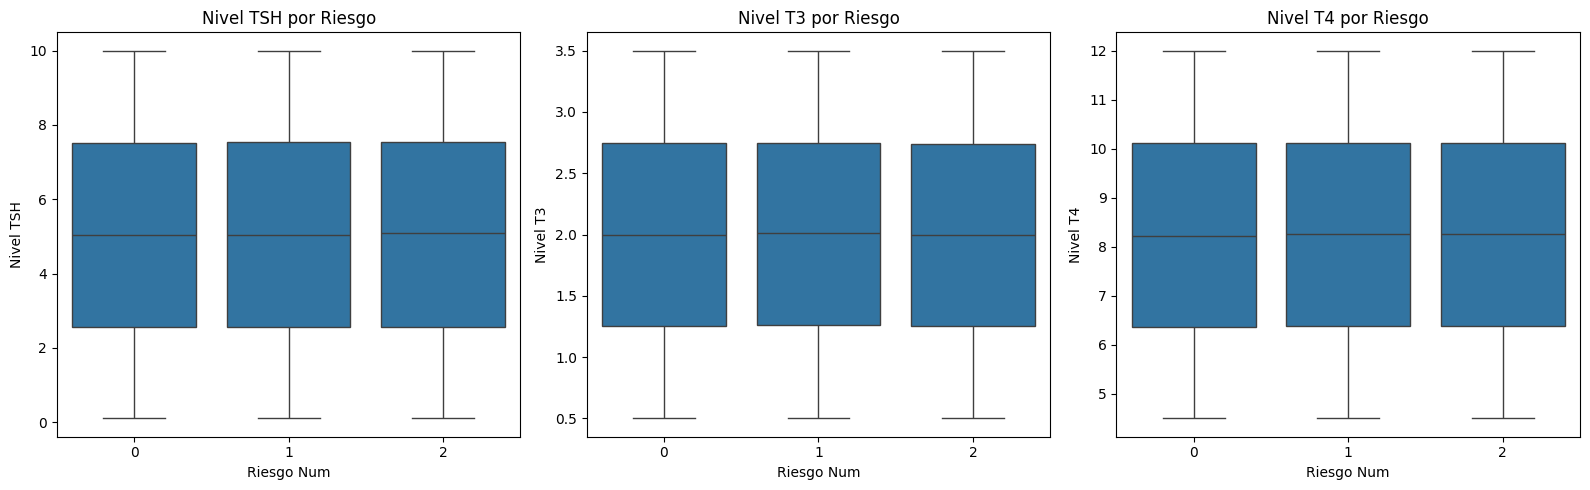

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

# TSH
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="Riesgo Num", y="Nivel TSH")
plt.title("Nivel TSH por Riesgo")

# T3
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Riesgo Num", y="Nivel T3")
plt.title("Nivel T3 por Riesgo")

# T4
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Riesgo Num", y="Nivel T4")
plt.title("Nivel T4 por Riesgo")

plt.tight_layout()
plt.show()


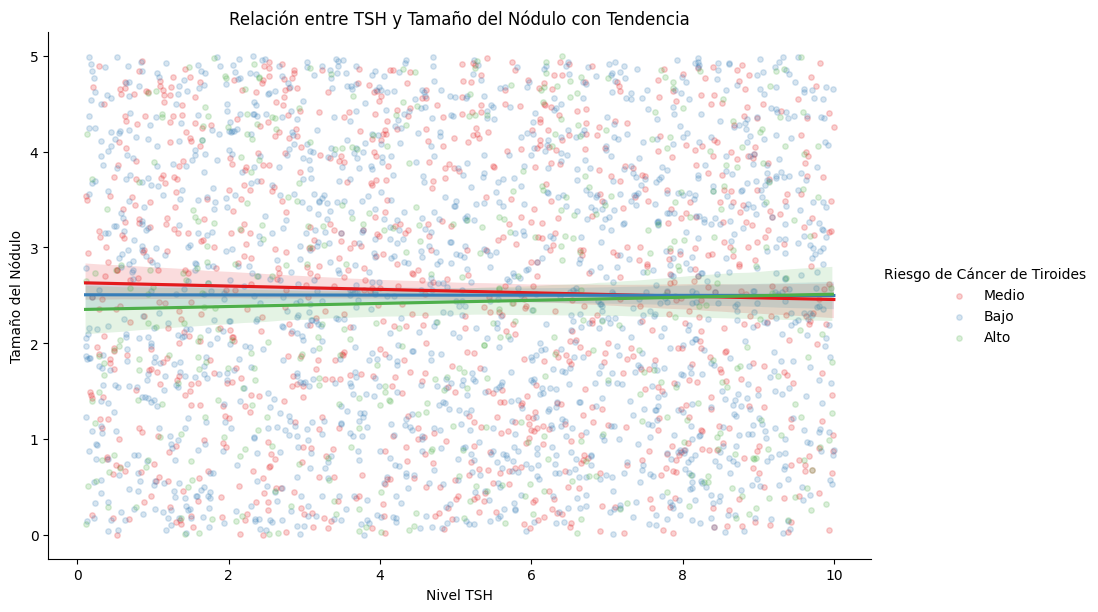

In [10]:
import seaborn as sns

sns.lmplot(
    data=df.sample(3000),
    x="Nivel TSH",
    y="Tama√±o del N√≥dulo",
    hue="Riesgo de C√°ncer de Tiroides",
    scatter_kws={"alpha": 0.2, "s": 15},
    height=6,
    aspect=1.5,
    palette="Set1"
)
plt.title("Relaci√≥n entre TSH y Tama√±o del N√≥dulo con Tendencia")
plt.show()

In [11]:
df[["Nivel TSH", "Tama√±o del N√≥dulo"]].corr()


Nivel TSH  Tama√±o del N√≥dulo
Nivel TSH           1.000000           0.000416
Tama√±o del N√≥dulo   0.000416           1.000000

## Interpretaci√≥n

A partir del an√°lisis exploratorio, se observa que **no existe una correlaci√≥n lineal significativa entre el Nivel de TSH y el Tama√±o del N√≥dulo** (r ‚âà 0.0004), lo que sugiere que estas variables **no est√°n relacionadas directamente entre s√≠** en la muestra total analizada.

Esto **no invalida la hip√≥tesis H1**, pero s√≠ indica que, en general, los pacientes con TSH alto no necesariamente presentan n√≥dulos de mayor tama√±o. Es posible que estas variables se comporten de forma independiente o que su relaci√≥n solo sea visible en subgrupos espec√≠ficos.

##Analis√≠s de la Hip√≥tesis 2 (h2)
H2: Los pacientes que presentan uno o m√°s factores de riesgo cl√≠nicos (antecedente familiar, obesidad, exposici√≥n a radiaci√≥n, deficiencia de yodo, tabaquismo o diabetes) tienden a tener un mayor riesgo de c√°ncer de tiroides.

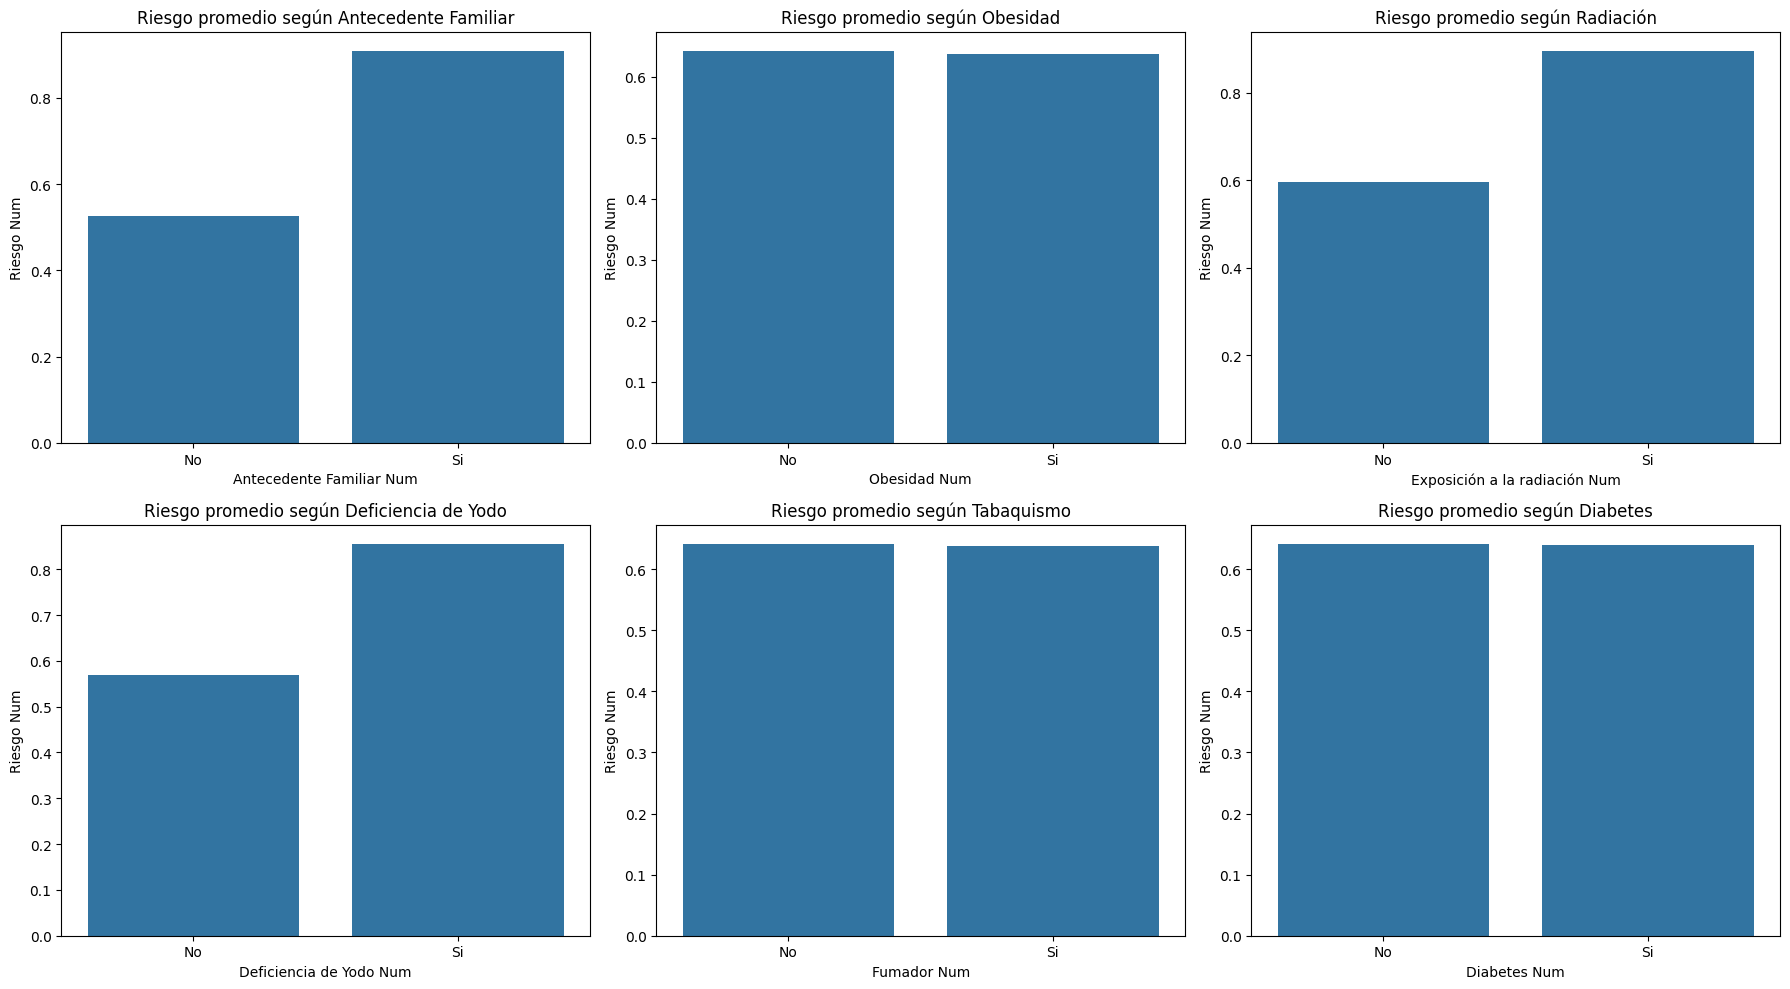

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

factores = [
    ("Antecedente Familiar Num", "Antecedente Familiar"),
    ("Obesidad Num", "Obesidad"),
    ("Exposici√≥n a la radiaci√≥n Num", "Radiaci√≥n"),
    ("Deficiencia de Yodo Num", "Deficiencia de Yodo"),
    ("Fumador Num", "Tabaquismo"),
    ("Diabetes Num", "Diabetes")
]

plt.figure(figsize=(18,10))

for i, (col, titulo) in enumerate(factores):
    plt.subplot(2, 3, i+1)
    sns.barplot(data=df, x=col, y="Riesgo Num", errorbar=None)
    plt.title(f"Riesgo promedio seg√∫n {titulo}")
    plt.xticks([0,1], ["No", "Si"])

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

factores = {
    "Antecedente Familiar Num": "Antecedente Familiar",
    "Obesidad Num": "Obesidad",
    "Exposici√≥n a la radiaci√≥n Num": "Radiaci√≥n",
    "Deficiencia de Yodo Num": "Deficiencia de Yodo",
    "Fumador Num": "Tabaquismo",
    "Diabetes Num": "Diabetes"
}

# Crear una tabla con el riesgo promedio para cada valor (0 = No, 1 = S√≠)
resultados = []

for col, nombre in factores.items():
    promedio_no = df[df[col] == 0]["Riesgo Num"].mean()
    promedio_si = df[df[col] == 1]["Riesgo Num"].mean()
    resultados.append({
        "Factor de Riesgo": nombre,
        "Riesgo Promedio (No)": round(promedio_no, 3),
        "Riesgo Promedio (S√≠)": round(promedio_si, 3)
    })
# Mostrar como DataFrame
tabla_riesgo = pd.DataFrame(resultados)
print(tabla_riesgo)

       Factor de Riesgo  Riesgo Promedio (No)  Riesgo Promedio (S√≠)
0  Antecedente Familiar                 0.526                 0.907
1              Obesidad                 0.642                 0.638
2             Radiaci√≥n                 0.596                 0.895
3   Deficiencia de Yodo                 0.569                 0.855
4            Tabaquismo                 0.641                 0.638
5              Diabetes                 0.641                 0.639


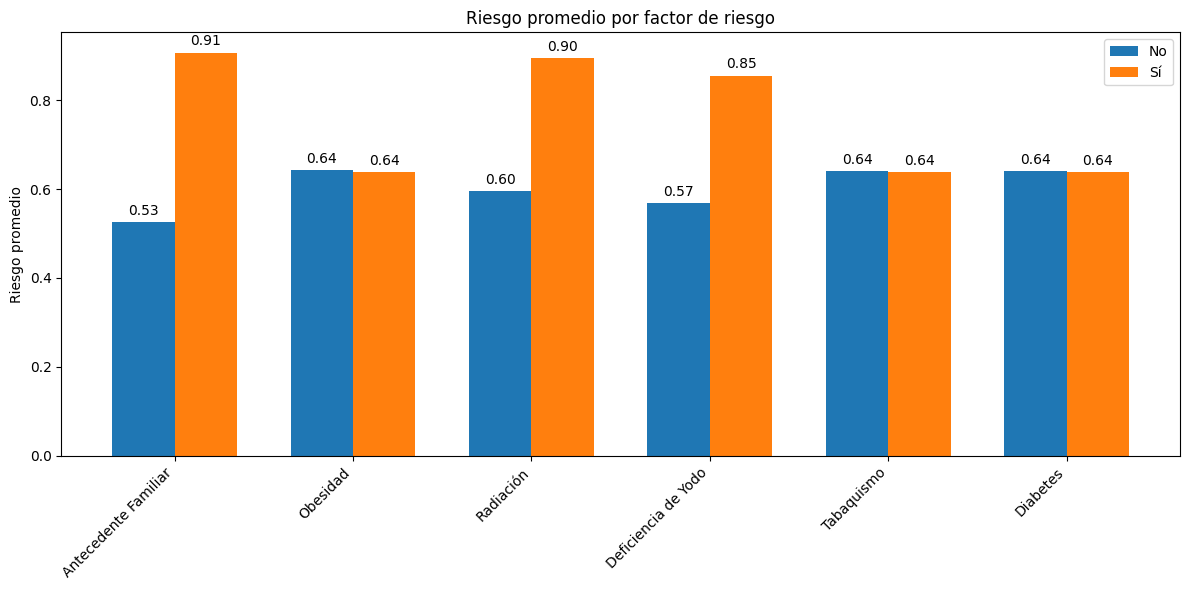

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer los datos de la tabla previa
factores = tabla_riesgo["Factor de Riesgo"]
riesgo_no = tabla_riesgo["Riesgo Promedio (No)"]
riesgo_si = tabla_riesgo["Riesgo Promedio (S√≠)"]

x = np.arange(len(factores))  # posiciones
ancho = 0.35  # ancho de las barras

# Crear el gr√°fico
fig, ax = plt.subplots(figsize=(12,6))
barras1 = ax.bar(x - ancho/2, riesgo_no, width=ancho, label="No")
barras2 = ax.bar(x + ancho/2, riesgo_si, width=ancho, label="S√≠")

# Etiquetas y formato
ax.set_ylabel("Riesgo promedio")
ax.set_title("Riesgo promedio por factor de riesgo")
ax.set_xticks(x)
ax.set_xticklabels(factores, rotation=45, ha="right")
ax.legend()

# Mostrar los valores arriba de cada barra
for barras in [barras1, barras2]:
    for bar in barras:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos vertical arriba
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [15]:
# Selecci√≥n de columnas relevantes para calcular la correlaci√≥n
variables_correlacion = [
    "Riesgo Num", "Antecedente Familiar Num", "Obesidad Num", "Exposici√≥n a la radiaci√≥n Num",
    "Deficiencia de Yodo Num", "Fumador Num", "Diabetes Num"
]

matriz_corr = df[variables_correlacion].corr()
print(matriz_corr["Riesgo Num"].sort_values(ascending=False))


Riesgo Num                       1.000000
Antecedente Familiar Num         0.239961
Deficiencia de Yodo Num          0.169618
Exposici√≥n a la radiaci√≥n Num    0.146727
Diabetes Num                    -0.001021
Fumador Num                     -0.001657
Obesidad Num                    -0.002468
Name: Riesgo Num, dtype: float64


## Interpretaci√≥n

Se evalu√≥ si los pacientes con distintos factores cl√≠nicos codificados como variables binarias tienen un mayor riesgo de c√°ncer de tiroides.

- **Antecedente Familiar**: El riesgo promedio fue significativamente m√°s alto en pacientes con antecedentes familiares. Y su correlacion con el **Riesgo** marca un r ‚âà 0.24
- **Deficiencia de Yodo**: El riesgo promedio fue m√°s alto en pacientes con Deficiencia de Yodo. Y su correlacion con el **Riesgo** marca un r ‚âà 0.17
- **Exposici√≥n a la radiaci√≥n**: Tambi√©n mostr√≥ un mayor riesgo promedio. Y su correlacion con el **Riesgo** marca un r ‚âà 0.15

- **Factores con bajo o nulo impacto aparente**:
  - Tabaquismo, Obesidad y Diabetes: correlaci√≥n cercana a cero, sin diferencias significativas entre grupos.

La evidencia respalda la **hip√≥tesis H2**. Algunos factores est√°n relacionados con un mayor riesgo y deber√≠an considerarse en decisiones cl√≠nicas.

# An√°lisis de Correlaci√≥n entre todas las variables

Como parte del an√°lisis exploratorio, se calcul√≥ la **matriz de correlaci√≥n** entre todas las variables num√©ricas del dataset, incluyendo:

- Variables cl√≠nicas (Edad, TSH, T3, T4, Tama√±o del N√≥dulo).
- Factores de riesgo (Antecedente Familiar, Exposici√≥n a la Radiaci√≥n, Obesidad, Deficiencia de Yodo, Fumador, Diabetes.).
- Variables codificadas (G√©nero, Diagn√≥stico, Riesgo de C√°ncer de Tiroides).

### Principales hallazgos:
- La mayor√≠a de las correlaciones entre variables num√©ricas son **muy d√©biles** (cercanas a 0).
- Las correlaciones m√°s destacadas se observaron entre:
  - `Antecedente Familiar Num` y `Riesgo Num`: **0.240**
  - `Deficiencia de Yodo Num` y `Riesgo Num`: **0.170**
  - `Exposici√≥n a la radiaci√≥n Num` y `Riesgo Num`: **0.147**
  - `Diagn√≥stico Num` y `Riesgo Num`: **0.365**

Estas relaciones no son lo suficientemente fuertes como para establecer causalidad, pero s√≠ permiten **hip√≥tesis sobre patrones de riesgo**


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


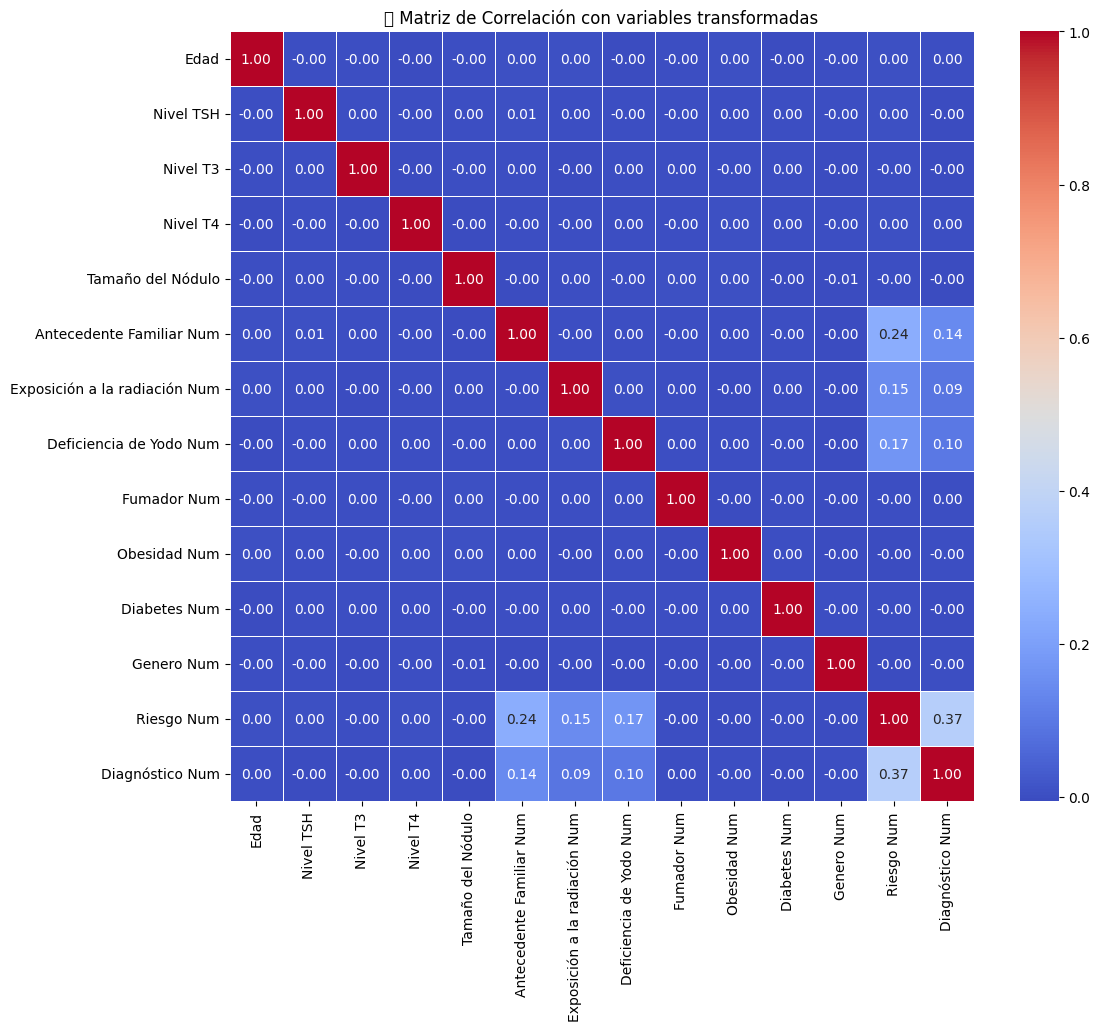

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables num√©ricas para el an√°lisis de correlaci√≥n
variables_correlacion = [
    "Edad", "Nivel TSH", "Nivel T3", "Nivel T4", "Tama√±o del N√≥dulo",
    "Antecedente Familiar Num", "Exposici√≥n a la radiaci√≥n Num",
    "Deficiencia de Yodo Num", "Fumador Num", "Obesidad Num", "Diabetes Num",
    "Genero Num", "Riesgo Num", "Diagn√≥stico Num"
]

# Calcular matriz de correlaci√≥n
matriz_corr = df[variables_correlacion].corr()

# Graficar heatmap
plt.figure(figsize=(12,10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("üîé Matriz de Correlaci√≥n con variables transformadas")
plt.show()



In [17]:
# Mostrar matriz de correlaci√≥n redondeada para copiar
matriz_corr_redondeada = matriz_corr.round(3)

# Mostrar como tabla
print(matriz_corr_redondeada)

                                Edad  Nivel TSH  Nivel T3  Nivel T4  \
Edad                           1.000     -0.001    -0.001    -0.002   
Nivel TSH                     -0.001      1.000     0.000    -0.001   
Nivel T3                      -0.001      0.000     1.000    -0.004   
Nivel T4                      -0.002     -0.001    -0.004     1.000   
Tama√±o del N√≥dulo             -0.001      0.000    -0.002    -0.002   
Antecedente Familiar Num       0.003      0.005     0.001    -0.000   
Exposici√≥n a la radiaci√≥n Num  0.004      0.000    -0.003    -0.000   
Deficiencia de Yodo Num       -0.002     -0.001     0.000     0.001   
Fumador Num                   -0.000     -0.001     0.001    -0.000   
Obesidad Num                   0.002      0.001    -0.001     0.002   
Diabetes Num                  -0.003      0.002     0.002     0.001   
Genero Num                    -0.000     -0.000    -0.003    -0.000   
Riesgo Num                     0.003      0.002    -0.000     0.003   
Di

##**Parte Final**
##Modelado Predictivo
###Objetivos del Modelado

En esta secci√≥n se desarrollar√°n modelos de machine learning con el objetivo de predecir dos variables clave:

1. **Diagn√≥stico Num**: Clasificaci√≥n binaria (0: benigno, 1: maligno).
2. **Riesgo Num**: Clasificaci√≥n multiclase (0: bajo, 1: medio, 2: alto).

Se utilizar√° un enfoque supervisado con modelos de clasificaci√≥n, priorizando la interpretabilidad y la evaluaci√≥n de m√©tricas relevantes como **accuracy, precision, recall y f1-score**. Tambi√©n se evaluar√° la **importancia de variables (feature importance)** para entender qu√© factores cl√≠nicos aportan m√°s a las predicciones.

Adem√°s, se aplicar√° **validaci√≥n cruzada** para robustecer los resultados y, si es necesario, t√©cnicas de balanceo de clases como **SMOTE**.


In [29]:
# Filtramos columnas seleccionadas previamente por importancia
variables_diagnostico = ['Nivel TSH', 'Nivel T3', 'Antecedente Familiar Num',
                         'Exposici√≥n a la radiaci√≥n Num', 'Deficiencia de Yodo Num', 'Diabetes Num']
variables_riesgo = ['Nivel T3', 'Antecedente Familiar Num', 'Exposici√≥n a la radiaci√≥n Num',
                    'Deficiencia de Yodo Num', 'Fumador Num', 'Genero Num']

# Definimos variables X (predictoras) e y (targets)
X_diag = df[variables_diagnostico]
y_diag = df['Diagn√≥stico Num']

X_riesgo = df[variables_riesgo]
y_riesgo = df['Riesgo Num']

# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(X_diag, y_diag, test_size=0.3, random_state=42)
X_train_riesgo, X_test_riesgo, y_train_riesgo, y_test_riesgo = train_test_split(X_riesgo, y_riesgo, test_size=0.3, random_state=42)


##**Diagn√≥stico**


In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Aplicar SMOTE sobre los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_diag, y_train_diag)

# Seleccionar caracter√≠sticas m√°s importantes (k=6) sobre el set balanceado
selector_diag = SelectKBest(score_func=f_classif, k=6)
X_train_sel_diag = selector_diag.fit_transform(X_train_bal, y_train_bal)
X_test_sel_diag = selector_diag.transform(X_test_diag)

# Entrenar modelo con Random Forest sobre el set balanceado y reducido
model_diag_bal = RandomForestClassifier(random_state=42)
model_diag_bal.fit(X_train_sel_diag, y_train_bal)

# Evaluar el modelo sobre el set de test original (no balanceado)
y_pred_diag_bal = model_diag_bal.predict(X_test_sel_diag)

# M√©tricas de evaluaci√≥n
print("Accuracy:", accuracy_score(y_test_diag, y_pred_diag_bal))
print("Precision:", precision_score(y_test_diag, y_pred_diag_bal, average='binary'))
print("Recall:", recall_score(y_test_diag, y_pred_diag_bal, average='binary'))
print("F1 Score:", f1_score(y_test_diag, y_pred_diag_bal, average='binary'))
print("\nMatriz de Confusi√≥n:\n", confusion_matrix(y_test_diag, y_pred_diag_bal))
print("\nReporte de Clasificaci√≥n:\n", classification_report(y_test_diag, y_pred_diag_bal))




Accuracy: 0.6503573219658977
Precision: 0.2744399492784252
Recall: 0.306287485679628
F1 Score: 0.2894904458598726

Matriz de Confusi√≥n:
 [[36953 12016]
 [10294  4545]]

Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77     48969
           1       0.27      0.31      0.29     14839

    accuracy                           0.65     63808
   macro avg       0.53      0.53      0.53     63808
weighted avg       0.66      0.65      0.66     63808



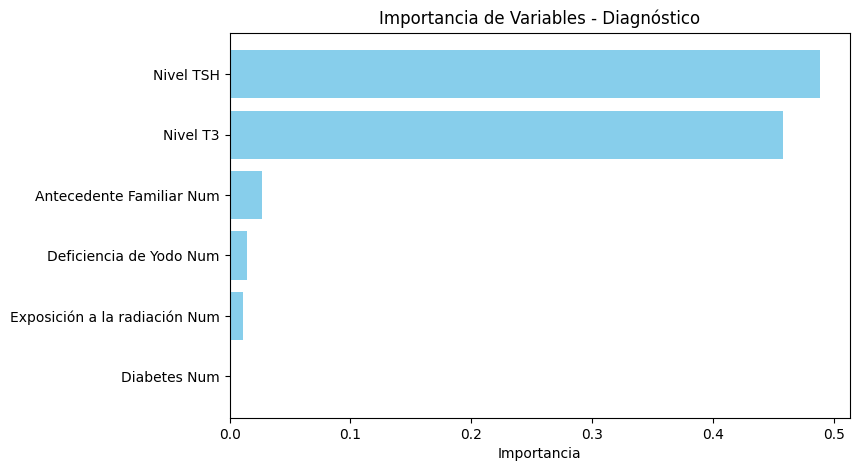

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtener importancias
importancias = model_diag_bal.feature_importances_
caracteristicas = np.array(variables_diagnostico)[selector_diag.get_support()]

# Crear DataFrame para mejor visualizaci√≥n
df_importancias = pd.DataFrame({
    'Caracter√≠stica': caracteristicas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Gr√°fico
plt.figure(figsize=(8,5))
plt.barh(df_importancias['Caracter√≠stica'], df_importancias['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de Variables - Diagn√≥stico')
plt.gca().invert_yaxis()
plt.show()


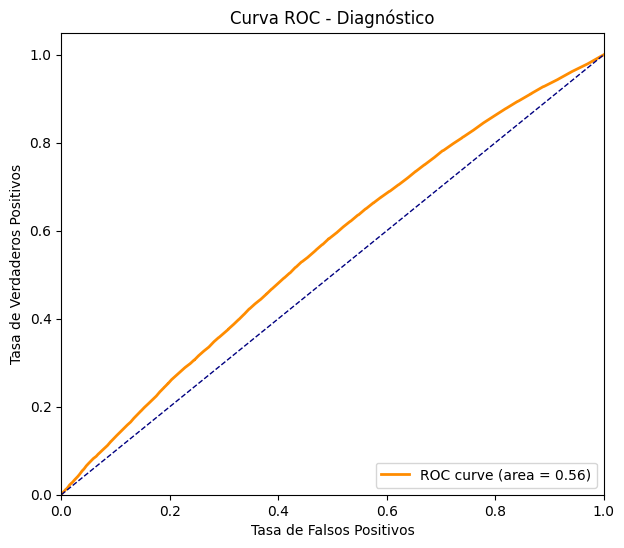

In [37]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades para la clase positiva
y_prob_diag = model_diag_bal.predict_proba(X_test_sel_diag)[:, 1]

# Calcular ROC curve
fpr, tpr, thresholds = roc_curve(y_test_diag, y_prob_diag)
roc_auc = auc(fpr, tpr)

# Graficar ROC curve
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Diagn√≥stico')
plt.legend(loc="lower right")
plt.show()


##**Riesgo**

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Aplicar SMOTE sobre los datos de entrenamiento de riesgo
smote_riesgo = SMOTE(random_state=42)
X_train_riesgo_bal, y_train_riesgo_bal = smote_riesgo.fit_resample(X_train_riesgo, y_train_riesgo)

# Seleccionar caracter√≠sticas m√°s importantes (k=6)
selector_riesgo = SelectKBest(score_func=f_classif, k=6)
X_train_sel_riesgo = selector_riesgo.fit_transform(X_train_riesgo_bal, y_train_riesgo_bal)
X_test_sel_riesgo = selector_riesgo.transform(X_test_riesgo)

# Entrenar modelo Random Forest para riesgo
model_riesgo_bal = RandomForestClassifier(random_state=42)
model_riesgo_bal.fit(X_train_sel_riesgo, y_train_riesgo_bal)

# Predecir sobre el set de test original
y_pred_riesgo_bal = model_riesgo_bal.predict(X_test_sel_riesgo)

# M√©tricas
print("Accuracy:", accuracy_score(y_test_riesgo, y_pred_riesgo_bal))
print("Precision:", precision_score(y_test_riesgo, y_pred_riesgo_bal, average='weighted'))
print("Recall:", recall_score(y_test_riesgo, y_pred_riesgo_bal, average='weighted'))
print("F1 Score:", f1_score(y_test_riesgo, y_pred_riesgo_bal, average='weighted'))
print("\nMatriz de Confusi√≥n:\n", confusion_matrix(y_test_riesgo, y_pred_riesgo_bal))
print("\nReporte de Clasificaci√≥n:\n", classification_report(y_test_riesgo, y_pred_riesgo_bal))



Accuracy: 0.40078046639919757
Precision: 0.4475137669130529
Recall: 0.40078046639919757
F1 Score: 0.4046427133971917

Matriz de Confusi√≥n:
 [[11705 11700  9080]
 [ 7763  7879  6082]
 [ 1895  1715  5989]]

Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.55      0.36      0.43     32485
           1       0.37      0.36      0.37     21724
           2       0.28      0.62      0.39      9599

    accuracy                           0.40     63808
   macro avg       0.40      0.45      0.40     63808
weighted avg       0.45      0.40      0.40     63808



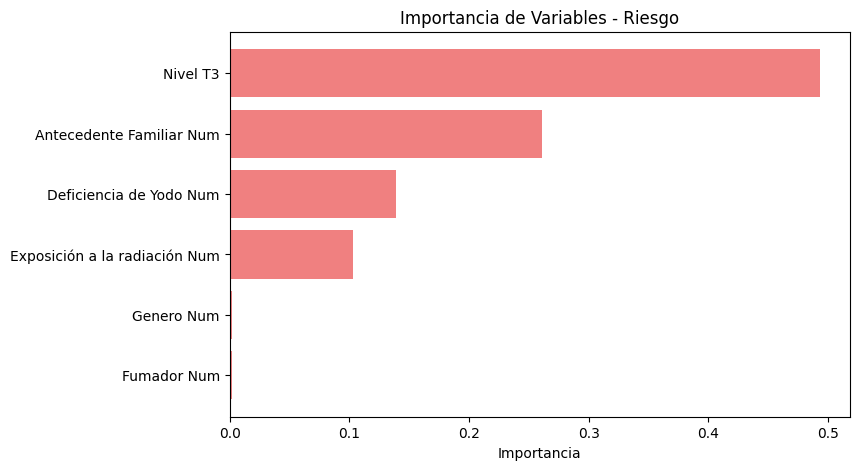

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtener importancias
importancias_riesgo = model_riesgo_bal.feature_importances_
caracteristicas_riesgo = np.array(variables_riesgo)[selector_riesgo.get_support()]

# Crear DataFrame
df_importancias_riesgo = pd.DataFrame({
    'Caracter√≠stica': caracteristicas_riesgo,
    'Importancia': importancias_riesgo
}).sort_values(by='Importancia', ascending=False)

# Gr√°fico
plt.figure(figsize=(8,5))
plt.barh(df_importancias_riesgo['Caracter√≠stica'], df_importancias_riesgo['Importancia'], color='lightcoral')
plt.xlabel('Importancia')
plt.title('Importancia de Variables - Riesgo')
plt.gca().invert_yaxis()
plt.show()


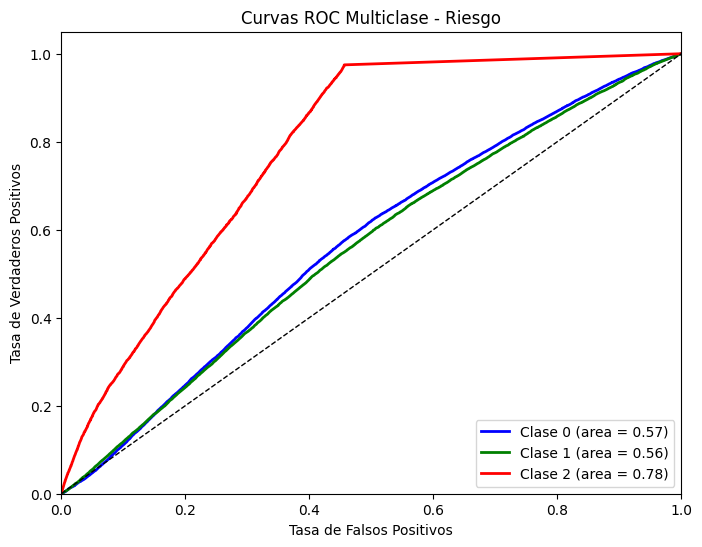

In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarizar etiquetas para multiclase
y_test_bin = label_binarize(y_test_riesgo, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

# Obtener probabilidades
y_score = model_riesgo_bal.predict_proba(X_test_sel_riesgo)

# Calcular ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure(figsize=(8,6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC Multiclase - Riesgo')
plt.legend(loc="lower right")
plt.show()


En este proyecto se analizaron factores cl√≠nicos asociados al c√°ncer de tiroides y se desarrollaron modelos predictivos para clasificar tanto el diagn√≥stico (benigno o maligno) como el riesgo (bajo, medio o alto).

El an√°lisis exploratorio identific√≥ que antecedentes familiares, deficiencia de yodo y exposici√≥n a la radiaci√≥n son los factores m√°s relacionados con un mayor riesgo de c√°ncer de tiroides. Por otro lado, variables como tabaquismo, obesidad y diabetes no mostraron una asociaci√≥n significativa en esta muestra.

Respecto al modelado predictivo, el modelo Random Forest para diagn√≥stico logr√≥ un rendimiento moderado, con una exactitud del 65%, aunque la capacidad para detectar casos malignos sigue siendo limitada debido al desequilibrio en las clases y la complejidad del problema. Las variables m√°s relevantes para la predicci√≥n fueron los niveles hormonales TSH y T3.

En cuanto a la predicci√≥n del riesgo, el modelo mostr√≥ un rendimiento menor, con una exactitud del 40%, indicando que predecir la categor√≠a de riesgo es un desaf√≠o mayor. Sin embargo, el modelo identific√≥ que el nivel de T3, antecedentes familiares y exposici√≥n a la radiaci√≥n son variables importantes para esta tarea.

Entre las limitaciones del estudio se destaca el desequilibrio de las clases, que impacta negativamente en la capacidad predictiva de los modelos. Para mejorar los resultados futuros, se recomienda ampliar la base de datos, probar t√©cnicas avanzadas de balanceo, explorar otros algoritmos de machine learning y realizar validaci√≥n cl√≠nica para interpretar los hallazgos.

En conclusi√≥n, el proyecto aporta evidencia sobre factores asociados al c√°ncer de tiroides y presenta un punto de partida para modelos predictivos que podr√≠an ayudar en la toma de decisiones cl√≠nicas, aunque es necesario continuar con refinamientos y validaciones adicionales